**Exp 6: Credit Risk Assessment: Build a credit scoring model to assess
the creditworthiness of applicants using historical financial data and
perform comparative analysis (Logistic Regression, Random Forest,
XGBoost)**

Note: Use Evaluation Metrics (Accuracy, Precision, Recall,
F1-Score for binary classification), (ROC-AUC, Accuracy,
Precision, Recall, Weighted / Macro/ Micro Average F1-Score for
Multiclassification task) and Confusion Matrix

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report

In [18]:
df=pd.read_csv('/content/drive/MyDrive/credit_risk_assessment_500_samples.csv')
df.head()

,Applicant_ID,Age,Annual_Income,Employment_Years,Credit_Score,Loan_Amount,Loan_Term_Months,Existing_Loans_Count,Debt_to_Income_Ratio,Late_Payments_Last_2Yrs,Credit_Risk
0,1,59,153267,28,818,196649,12,2,0.68,0,High
1,2,49,232745,0,436,175354,60,0,0.23,5,High
2,3,35,974945,19,797,662297,48,3,0.54,0,Medium
3,4,63,307164,29,776,831725,48,0,0.56,4,High
4,5,28,685626,6,893,498625,60,3,0.66,8,High


In [19]:
print(df.shape)
df.info()
df.describe()


(500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Applicant_ID             500 non-null    int64  
 1   Age                      500 non-null    int64  
 2   Annual_Income            500 non-null    int64  
 3   Employment_Years         500 non-null    int64  
 4   Credit_Score             500 non-null    int64  
 5   Loan_Amount              500 non-null    int64  
 6   Loan_Term_Months         500 non-null    int64  
 7   Existing_Loans_Count     500 non-null    int64  
 8   Debt_to_Income_Ratio     500 non-null    float64
 9   Late_Payments_Last_2Yrs  500 non-null    int64  
 10  Credit_Risk              500 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 43.1+ KB


,Applicant_ID,Age,Annual_Income,Employment_Years,Credit_Score,Loan_Amount,Loan_Term_Months,Existing_Loans_Count,Debt_to_Income_Ratio,Late_Payments_Last_2Yrs
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,43.116000,8.271317e+05,14.702000,596.394000,521385.530000,37.032000,2.058000,0.409700,4.490000
std,144.481833,12.733217,3.848299e+05,8.713498,171.339795,281799.514154,17.117037,1.419389,0.175077,2.940611
min,1.000000,21.000000,1.504040e+05,0.000000,300.000000,55901.000000,12.000000,0.000000,0.100000,0.000000
25%,125.750000,32.000000,5.062622e+05,7.000000,452.000000,266621.750000,24.000000,1.000000,0.250000,2.000000
50%,250.500000,44.000000,8.334275e+05,15.500000,602.000000,533640.000000,36.000000,2.000000,0.420000,5.000000
75%,375.250000,53.000000,1.148353e+06,22.000000,732.250000,765362.500000,48.000000,3.000000,0.560000,7.000000
max,500.000000,64.000000,1.498464e+06,29.000000,898.000000,999621.000000,60.000000,4.000000,0.700000,9.000000


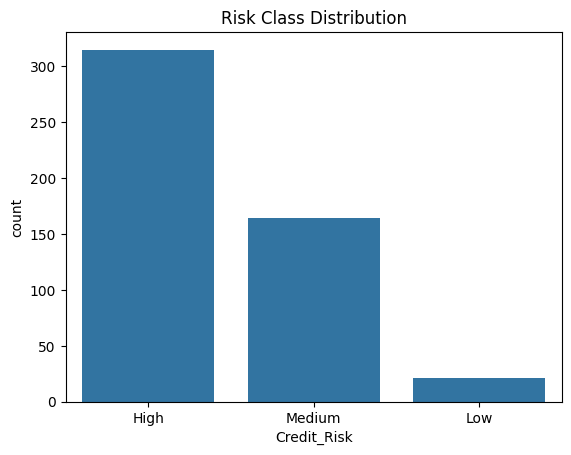

In [20]:
sns.countplot(x="Credit_Risk",data=df)
plt.title("Risk Class Distribution")
plt.show()


In [21]:
le=LabelEncoder()
df["Credit_Risk"]=le.fit_transform(df["Credit_Risk"])


In [22]:
df=df.drop("Applicant_ID",axis=1)


In [23]:
X=df.drop("Credit_Risk",axis=1)
y=df["Credit_Risk"]


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [25]:
models={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":XGBClassifier(eval_metric="mlogloss")
}


In [26]:
results=[]

for name,model in models.items():

    model.fit(X_train,y_train)
    pred=model.predict(X_test)

    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred,average="weighted")
    rec=recall_score(y_test,pred,average="weighted")
    f1w=f1_score(y_test,pred,average="weighted")
    f1m=f1_score(y_test,pred,average="macro")
    f1mi=f1_score(y_test,pred,average="micro")

    results.append([name,acc,pre,rec,f1w,f1m,f1mi])

results_df=pd.DataFrame(results,columns=[
"Model","Accuracy","Precision","Recall",
"F1_weighted","F1_macro","F1_micro"
])

results_df


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1_weighted,F1_macro,F1_micro
0,Logistic Regression,0.68,0.699529,0.68,0.683579,0.431938,0.68
1,Random Forest,0.98,0.981429,0.98,0.977037,0.876543,0.98
2,XGBoost,1.00,1.000000,1.00,1.000000,1.000000,1.00


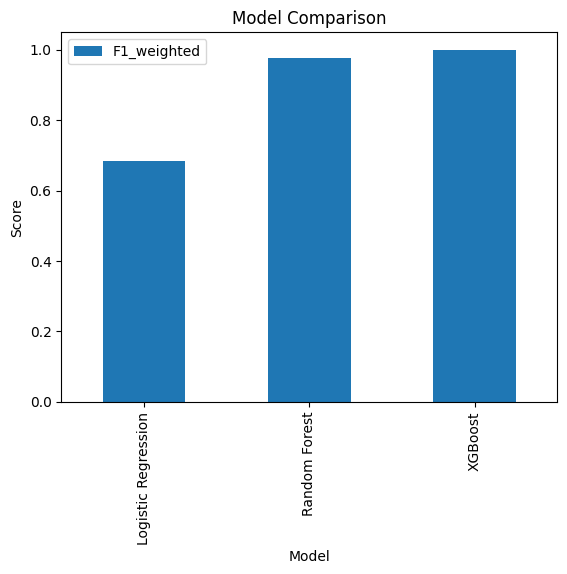

In [27]:
results_df.plot(x="Model",y="F1_weighted",kind="bar")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


In [28]:
best_name=results_df.sort_values("F1_weighted",ascending=False).iloc[0,0]
best_model=models[best_name]

print("Best Model:",best_name)


Best Model: XGBoost


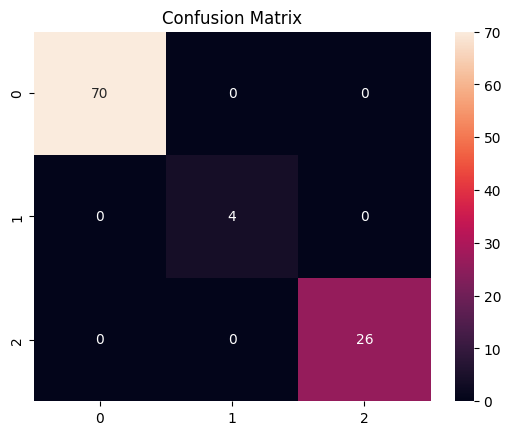

In [29]:
pred=best_model.predict(X_test)

cm=confusion_matrix(y_test,pred)

sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [30]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        26

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

